In [29]:
import numpy as np
import mip as mp
import matplotlib.pyplot as plt

Calculando a quantidade de cada produto que deve ser produzido para maximizar o lucro

In [30]:
sell_price = [3000, 5000]
tons = [16, 11, 15]

In [31]:
copper = [0.5, 0.2]
zinc = [0.25, 0.3]
lead = [0.25, 0.5]

In [32]:
m = mp.Model("Max")

x1 = m.add_var(var_type=mp.CONTINUOUS, name="Low Resistence")
x2 = m.add_var(var_type=mp.CONTINUOUS, name="High Resistence")

m += copper[0] * x1 + copper[1] * x2 <= tons[0], "Copper Restriction"
m += zinc[0] * x1 + zinc[1] * x2 <= tons[1], "Zinc Restriction"
m += lead[0] * x1 + lead[1] * x2 <= tons[2], "Lead Restriction"

m.objective = mp.maximize(sell_price[0] * x1 + sell_price[1] * x2)

m.optimize()

Coin0506I Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
Clp1000I sum of infeasibilities 0 - average 0, 0 fixed columns
Coin0506I Presolve 3 (0) rows, 2 (0) columns and 6 (0) elements
Clp0006I 0  Obj 160000 Dual inf 800000 (2)
Clp0029I End of values pass after 2 iterations
Clp0000I Optimal - objective value 160000
Clp0000I Optimal - objective value 160000
Clp0000I Optimal - objective value 160000
Clp0032I Optimal objective 160000 - 0 iterations time 0.002, Idiot 0.00
Starting solution of the Linear programming problem using Primal Simplex



<OptimizationStatus.OPTIMAL: 0>

In [33]:
print(f"Low Resistence: {x1.x:.4f}")
print(f"High Resistence: {x2.x:.4f}")
print(f"Max return: {m.objective_value}")

Low Resistence: 20.0000
High Resistence: 20.0000
Max return: 160000.0


Plotando o gráfico do problema

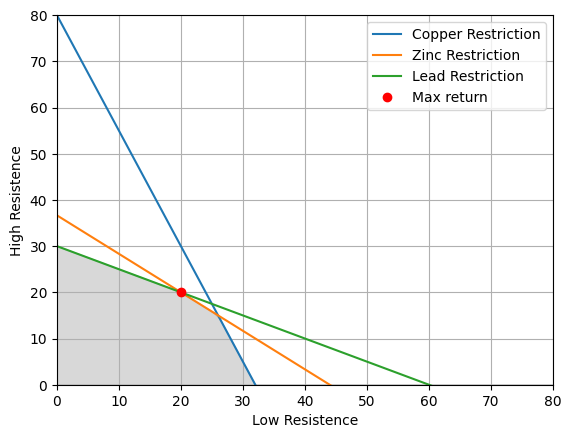

In [34]:
x = np.linspace(0, 80, 80)

copper_y = (tons[0] - copper[0] * x) / copper[1]
plt.plot(x, copper_y, label="Copper Restriction")

zinc_y = (tons[1] - zinc[0] * x) / zinc[1]
plt.plot(x, zinc_y, label="Zinc Restriction")

lead_y = (tons[2] - lead[0] * x) / lead[1]
plt.plot(x, lead_y, label="Lead Restriction")

plt.xlim(0, 80)
plt.ylim(0, 80)

plt.xlabel("Low Resistence")
plt.ylabel("High Resistence")
plt.plot(x1.x, x2.x, 'ro', label="Max return")
plt.fill_between(x, np.minimum(np.minimum(copper_y, zinc_y), lead_y), color="gray", alpha=0.3)

plt.grid()
plt.legend()
plt.show()